# <div align="center">Text Classification</div>
## <div style="float: left;">Sumanth Sajjan Vijaykumar</div>
## <div style="float: left;">Thejas Raju</div>

---

**Necessary basic imports**

In [122]:
import pandas as pd
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# TASK-1

## <div align="left">Web Scraping</div>

Defining a function to facilitate web scraping which can be reused for multiple categories.<br><br>
The function 
* takes category as input (which is a part of page link to the corresponding category) 
* returns the DataFrame with two attributes : Reviews and Ratings.

In [1]:
from bs4 import BeautifulSoup
import requests

def web_scraping(category):
    
    page_link = 'link'+category+'link.html'
    page_response = requests.get(page_link, timeout=5)
    page_content = BeautifulSoup(page_response.content, "html.parser")

    links = []
    for link in page_content.findAll('a'):    
        links.append(link.get('href'))
    
    reviews = []
    ratings = []

    for i in range(0,len(links)):
        page_link = 'link'+links[i]
        page_response = requests.get(page_link, timeout=5)
        page_content = BeautifulSoup(page_response.content, "html.parser")
    
        reviews.extend(page_content.find_all("p", {"class": "text"}))
        ratings.extend(page_content.find_all("p", {"class": "stars"}))
    
    reviews = [i.text for i in reviews]

    for i in range(0,len(ratings)):
        star=str(ratings[i])
        if(star.find("5-star")!=-1):
            ratings[i]="Positive"
        if(star.find("4-star")!=-1):
            ratings[i]="Positive"
        if(star.find("3-star")!=-1):
            ratings[i]="Positive"
        if(star.find("2-star")!=-1):
            ratings[i]="Negative"
        if(star.find("1-star")!=-1):
            ratings[i]="Negative"
        
    df = pd.DataFrame({'Reviews': reviews, 'Ratings': ratings},columns= ['Reviews', 'Ratings'])
    
    return df

**The following are two categories from which data is extracted:**
1. Automotive
2. Hotels and travel

**Automotive** - Reviews and Ratings scrapping:

In [124]:
df_Automotive = web_scraping('automotive')

# Writing scrapped reviews and ratings to Automotive.csv
df_Automotive.to_csv('Automotive.csv', sep=',', encoding='utf-8', index=False)

**Hotels and travel** - Reviews and Ratings scrapping:

In [125]:
df_HotelsAndTravel = web_scraping('hotels_travel')

# Writing scrapped reviews and ratings to Hotels and Travel.csv
df_HotelsAndTravel.to_csv('Hotels and Travel.csv', sep=',', encoding='utf-8', index=False)

# TASK-2 

## <div align="left">Text Preprocessing</div>

Defining the function for text preprocessing which can be reused for multiple catergories.<br><br>
The lemma_tokenizer function 
* tokenises each review using build_tokenizer()
* Coverts each token to lower case
* lemmatisation on each token

The preprocess function
* Returns vectorizer to be used for a particlar model

In [126]:
# imports for text processing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# define the function lemma_tokenizer
def lemma_tokenizer(text):
    # Fist tokenize the review
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(text)
    # convert to each token to lower case then perform lemmatisation on each token
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens = []
    for token in tokens:
        lemma_tokens.append( lemmatizer.lemmatize(token).lower() )
    return lemma_tokens

# define the function preprocess
def preprocess(data):
    # normalize the matrix using TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words="english",tokenizer=lemma_tokenizer)
    
    return X, vectorizer


## <div align="left">Automotive - Model Building and Evaluation</div>

In [156]:
# Import dataset from csv file
df_Automotive = pd.read_csv('Automotive.csv')
df_Automotive.head()

,Reviews,Ratings
0,I arrived at 3 PM and the dealership closed at...,Positive
1,I dropped my car off on a Wednesday morning fo...,Negative
2,My parents have been buying cars off of Donna ...,Positive
3,I recently bought another car from Donna Dunni...,Positive
4,I had to schedule an appointment due to the ai...,Positive


In [157]:
# splitting the dataset into input parameters and output parameters
X = df_Automotive.Reviews
y = df_Automotive.Ratings

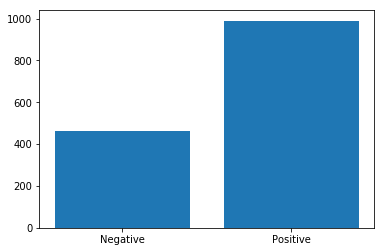

In [158]:
# check the target balance in the dataset
classes, counts = np.unique(y, return_counts=True)
bar_class = np.array([x for x in classes])
plt.bar(bar_class, counts)
plt.show()

In [159]:
# Handling the imbalanced data by the oversampling
n = len(np.where(y == 'Positive')[0])
balanced_index = np.hstack([np.random.choice(np.where(y == rating)[0], n, replace=True)
                      for rating in np.unique(y)])

X = X[balanced_index]
y = y[balanced_index]

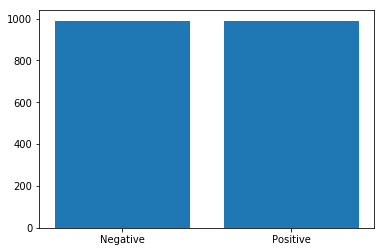

In [160]:
# check the target balance in the dataset
classes, counts = np.unique(y, return_counts=True)
bar_class = np.array([x for x in classes])
plt.bar(bar_class, counts)
plt.show()

In [161]:
# Calling defined function preprocess and get a vectorizer
X,Automotive_vectorizer = preprocess(X)
X = Automotive_vectorizer.fit_transform(X)

In [162]:
# Splitting training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [163]:
# Model with Multinomial Naive Bayes classifier for text classification
from sklearn.naive_bayes import MultinomialNB
Automotive_model = MultinomialNB()

# Training the model with train data
Automotive_model.fit(X_train, y_train)
print(Automotive_model)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [164]:
# Evaluating the model with test data
y_hat = Automotive_model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_hat)
print("Classification accuracy = %.2f" % acc)

Classification accuracy = 0.95


In [165]:
# Printing performance details
print(metrics.classification_report(y_test, y_hat))
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, y_hat))

              precision    recall  f1-score   support

    Negative       0.93      0.98      0.95       194
    Positive       0.98      0.93      0.95       202

   micro avg       0.95      0.95      0.95       396
   macro avg       0.95      0.95      0.95       396
weighted avg       0.95      0.95      0.95       396

Confusion matrix
[[190   4]
 [ 15 187]]


### Evaluation of Automotive_model:

* Accuracy:

Accuracy= Number of correct predictions/Total number of predictions = (190+187)/(190+4+15+187)= 0.952 ~= 95%

**The classifier achieves a high accuracy in classification of reviews pertaining to the automotive category.**

* F1 Scores:

F1 Score (Negative)= 2*(1/((1/Precision)+(1/Recall)))= 2*(1/((1/0.93)+(1/0.98)))= 0.95

F1 Score (Positive)= 2*(1/((1/Precision)+(1/Recall)))= 2*(1/((1/0.98)+(1/0.93)))= 0.95

**As the F1 Scores are closer to value 1, the model is said to be precise and robust.**

* Confusion Matrix:

**From the confusion matrix presented in the performance details, it can be seen that there are high number of True Positive (187) and high number of True Negatives (190) when compared to the False Positives (4) and False Negatives (15) which shows that the model is a good classifier.**

## <div align="left">Hotels and travel - Model Building and Evaluation</div>

In [167]:
# Import dataset from csv file
df_HotelsAndTravel = pd.read_csv('Hotels and Travel.csv')
df_HotelsAndTravel.head()

,Reviews,Ratings
0,I have used this service before and was satisf...,Negative
1,First time I tried using them the driver was n...,Negative
2,Driver picked me up on time at 6AM and even kn...,Positive
3,First time using this taxi and limo company as...,Positive
4,Great experience. Driver was early and was ver...,Positive


In [168]:
# splitting the dataset into input parameters and output parameters
X = df_HotelsAndTravel.Reviews
y = df_HotelsAndTravel.Ratings

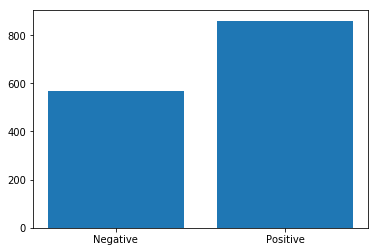

In [169]:
# check the target balance in the dataset
classes, counts = np.unique(y, return_counts=True)
bar_class = np.array([x for x in classes])
plt.bar(bar_class, counts)
plt.show()

In [170]:
# Handling the imbalanced data by the oversampling
n = len(np.where(y == 'Positive')[0])
balanced_index = np.hstack([np.random.choice(np.where(y == rating)[0], n, replace=True)
                      for rating in np.unique(y)])

X = X[balanced_index]
y = y[balanced_index]

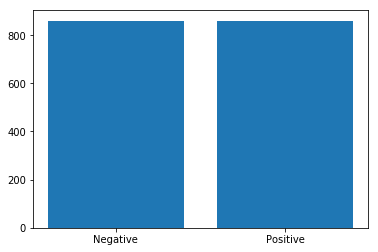

In [171]:
# check the target balance in the dataset
classes, counts = np.unique(y, return_counts=True)
bar_class = np.array([x for x in classes])
plt.bar(bar_class, counts)
plt.show()

In [172]:
# Calling defined function preprocess and get a vectorizer
X,HotelsAndTravel_vectorizer = preprocess(X)
X = HotelsAndTravel_vectorizer.fit_transform(X)

In [173]:
# Splitting training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [174]:
# Model with Multinomial Naive Bayes classifier for text classification
HotelsAndTravel_model = MultinomialNB()

# Training the model with train data
HotelsAndTravel_model.fit(X_train, y_train)
print(HotelsAndTravel_model)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [175]:
# Evaluating the model with text data
y_hat = HotelsAndTravel_model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_hat)
print("Classification accuracy = %.2f" % acc)

Classification accuracy = 0.93


In [176]:
# Print performance details
print(metrics.classification_report(y_test, y_hat))
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, y_hat))

              precision    recall  f1-score   support

    Negative       0.94      0.93      0.93       177
    Positive       0.92      0.94      0.93       167

   micro avg       0.93      0.93      0.93       344
   macro avg       0.93      0.93      0.93       344
weighted avg       0.93      0.93      0.93       344

Confusion matrix
[[164  13]
 [ 10 157]]


### Evaluation of HotelsAndTravel_model:

* Accuracy:

Accuracy= Number of correct predictions/Total number of predictions = (164+157)/(164+13+10+157)= 0.933 ~= 93%

**The classifier achieves a high accuracy in classification of reviews pertaining to the Hotels and Travel category.**

* F1 Scores:

F1 Score (Negative)= 2*(1/((1/Precision)+(1/Recall)))= 2*(1/((1/0.94)+(1/0.93)))= 0.93

F1 Score (Positive)= 2*(1/((1/Precision)+(1/Recall)))= 2*(1/((1/0.92)+(1/0.94)))= 0.93

**As the F1 Scores are closer to value 1, the model is said to be precise and robust.**

* Confusion Matrix:

**From the confusion matrix presented in the performance details, it can be seen that there are high number of True Positive (157) and high number of True Negatives (164) when compared to the False Positives (13) and False Negatives (10) which shows that the model is a good classifier.**


## Comparing the performance of Automotive_model and HotelsAndTravel_model:

* The Automotive_model is more accurate with an accuracy of 95% when compared to the HotelAndTravel_model which has an accuracy of 93%.

* The Automotive_model has a higher F1 score of 0.95 for both positive and negative reviews when compared to the F1 score of HotelAndTravel_model which is 0.93. Hence, for the given data, the Automotive_model is more accurate and robust of the two.

* As this model evaluates reviews, the number of False Positives must be low. The Automotive_model produces lesser number of False Positives when compared to the HotelsAndTravel_model. Whereas, the HotelsAndTravel_model has a lesser number of False Negatives when compared to the Automotive_model.




# TASK-3 

## <div align="left">Evaluating Automotive_model with Hotels and travel data</div>

In [177]:
# Import dataset from csv file
df_HotelsAndTravel = pd.read_csv('Hotels and Travel.csv')

# splitting the dataset into input parameters and output parameters
X = df_HotelsAndTravel.Reviews
y = df_HotelsAndTravel.Ratings

In [178]:
# Transform the Hotels and travel data using Automotive_vectorizer to pass the data to Automotive_model
X = Automotive_vectorizer.transform(X)

In [179]:
# Evaluating Automotive_model with Hotels and travel data
y_hat = Automotive_model.predict(X)
acc = metrics.accuracy_score(y, y_hat)
print("Classification accuracy = %.2f" % acc)

Classification accuracy = 0.84


In [180]:
# Print performance details
print(metrics.classification_report(y, y_hat))
print("Confusion matrix")
print(metrics.confusion_matrix(y, y_hat))

              precision    recall  f1-score   support

    Negative       0.79      0.84      0.81       570
    Positive       0.89      0.85      0.87       860

   micro avg       0.84      0.84      0.84      1430
   macro avg       0.84      0.84      0.84      1430
weighted avg       0.85      0.84      0.84      1430

Confusion matrix
[[476  94]
 [130 730]]


### Performance of Automotive_model with Hotels and Travel data:

* Accuracy:

Accuracy= Number of correct predictions/Total number of predictions = (476+730)/(476+94+130+730)= 0.843 ~= 84%

**The Automotive_model classifier achieves an accuracy of 84% in classification of reviews pertaining to the Hotels and Travel category.**

* F1 Scores:

F1 Score (Negative)= 2*(1/((1/Precision)+(1/Recall)))= 2*(1/((1/0.79)+(1/0.84)))= 0.81

F1 Score (Positive)= 2*(1/((1/Precision)+(1/Recall)))= 2*(1/((1/0.89)+(1/0.85)))= 0.87

**The F1 Scores are closer to value 1, but scores achieved when model was evaluated against automotive data was higher.**

* Confusion Matrix:

**From the confusion matrix presented in the performance details, it can be seen that there are high number of True Positive (730) and high number of True Negatives (476) when compared to the False Positives (94) and False Negatives (130). However, the number of False Positives and False Negatives is higher than the number achieved when the model was evealuated against Automotive data instead of Hotels and Travel data. This shows that the model is not a very good classifier for Hotels and Travel data.**

---

## <div align="left">Evaluating HotelsAndTravel_model with Automotive data</div>

In [181]:
# Import dataset from csv file
df_Automotive = pd.read_csv('Automotive.csv')

# splitting the dataset into input parameters and output parameters
X = df_Automotive.Reviews
y = df_Automotive.Ratings

In [182]:
# Transform the Automotive data using HotelsAndTravel_vectorizer to pass the data to HotelsAndTravel_model
X = HotelsAndTravel_vectorizer.transform(X)

In [183]:
# Evaluating HotelsAndTravel_model with Automotive data
y_hat = HotelsAndTravel_model.predict(X)
acc = metrics.accuracy_score(y, y_hat)
print("Classification accuracy = %.2f" % acc)

Classification accuracy = 0.70


In [184]:
# Print performance details
print(metrics.classification_report(y, y_hat))
print("Confusion matrix")
print(metrics.confusion_matrix(y, y_hat))

              precision    recall  f1-score   support

    Negative       0.52      0.97      0.68       465
    Positive       0.97      0.58      0.73       990

   micro avg       0.70      0.70      0.70      1455
   macro avg       0.75      0.77      0.70      1455
weighted avg       0.83      0.70      0.71      1455

Confusion matrix
[[449  16]
 [414 576]]


### Performance of HotelsAndTravel_model with Automotive data :

* Accuracy:

Accuracy= Number of correct predictions/Total number of predictions = (449+576)/(449+16+414+576)= 0.70 ~= 70%

**The HotelsAndTravel_model classifier achieves a low accuracy of 70% in classification of reviews pertaining to the Automotive category.**

* F1 Scores:

F1 Score (Negative)= 2*(1/((1/Precision)+(1/Recall)))= 2*(1/((1/0.52)+(1/0.97)))= 0.68

F1 Score (Positive)= 2*(1/((1/Precision)+(1/Recall)))= 2*(1/((1/0.97)+(1/0.58)))= 0.73

**There is an imbalace in the Precison and Recall for both Positive and Negative reviews and hence, the F1 Scores are lower than the scores achieved when model was evaluated against Hotels and Travel data.**

* Confusion Matrix:

**From the confusion matrix presented in the performance details, it can be seen that there are high number of True Positive (576), a high number of True Negatives (449), and in addition, there are a high number of False Negatives (414) as well when compared to the False Positives (16). The high number of False Negatives results in reduced accuracy and hence the model is not a good classifier of Automotive data.**

---

# <div align="left">Conclusion</div>

 Two classification models namely, Automotive_model and HotelsAndTravel_model were built. 

The Automotive_model was trained and tested using the reviews and ratings obtained from Automotive category. This resulted in high accuracy of classification and F1 scores which were closer to 1.
Similarly, the HotelsAndTravel_model was trained and tested using the reviews and ratings obtained from Hotels and Travel category. The accuracy of this model was lesser to the Automotive_model but achieved decent classification results for Hotel and Travel data.

The data used to build the respective models contain terms which are significant and specific to their respective categories. These terms largely influence the classification process. Hence, the model is biased towards the category used to build the model. Accuracy obtained when the Automotive_model was used to classify Hotels And Travel reviews and the HotelsAndTravel_model was used to classify the Automotive reviews were 84% and 70% respectively which is lower when compared to the accuracy obtained when models were used to classify reviews of their respective categories on which they were built.

However, reviews also contain few terms which can be positive and negative in nature and can help classify reviews. These terms occur across categories as they are generally used to convey a positive or a negative sentiment. The models also pick up these features and hence can perform accurate classifications of reviews of other categories to an extent. This can be observed as accuracy of 80% is obtained when Automotive_model is used to classify the Hotel and Travel reviews. 